<a href="https://colab.research.google.com/github/anamanuellar/analise-de-dados/blob/Frequencia-e-Medidas/Challenge_Enem_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import io
import pandas as pd
from google.colab import files
uploaded = files.upload()

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import seaborn as sns

In [ ]:
import numpy as np

In [ ]:
df = pd.read_json('/content/enem_2023.json')

In [ ]:
df.head()

,Linguagens,Ciências humanas,Ciências da natureza,Matemática,Redação,Sexo
0,585.669300,686.512178,390.482473,452.281333,546.371706,Homem
1,359.384608,642.084134,NaN,412.205207,741.825256,Mulher
2,622.732384,495.510719,443.183580,669.683401,684.515750,Homem
3,350.164605,602.041588,413.979810,676.608952,671.237114,Homem
4,384.093657,489.249140,609.758123,520.426698,744.375048,Homem


**1. Qual das disciplinas tem a maior amplitude de nota?**

In [ ]:
amplitude_disciplina1 = df['Linguagens'].max() - df['Linguagens'].min()
amplitude_disciplina2 = df['Ciências humanas'].max() - df['Ciências humanas'].min()
amplitude_disciplina3 = df['Ciências da natureza'].max() - df['Ciências da natureza'].min()
amplitude_disciplina4 = df['Matemática'].max() - df['Matemática'].min()
amplitude_disciplina5 = df['Redação'].max() - df['Redação'].min()



In [ ]:
# Criando dicionário para facilitar a identificação da disciplina com maior amplitude
amplitudes = {
    'Linguagens': amplitude_disciplina1,
    'Ciências humanas': amplitude_disciplina2,
    'Ciências da natureza': amplitude_disciplina3,
    'Matemática': amplitude_disciplina4,
    'Redação': amplitude_disciplina5
}


In [ ]:
disciplina_maior_amplitude = max(amplitudes, key=amplitudes.get)
print(f"A amplitude para Disciplina Linguagens é: {amplitude_disciplina1}")
print(f"A amplitude para Disciplina Ciências humanas é: {amplitude_disciplina2}")
print(f"A amplitude para Disciplina Ciências da natureza é: {amplitude_disciplina3}")
print(f"A amplitude para Disciplina Matemática é: {amplitude_disciplina4}")
print(f"A amplitude para Disciplina Redação é: {amplitude_disciplina5}")
print(f"A disciplina com maior amplitude é: {disciplina_maior_amplitude}")

**2. Qual é a média e a mediana para cada uma das disciplinas? (Lembre-se
de remover todos os valores nulos quando considerar a mediana)**

In [ ]:
df_sem_nulos = df.dropna()

In [ ]:
# Média para cada disciplina
media_disciplina1 = df_sem_nulos['Linguagens'].mean()
media_disciplina2 = df_sem_nulos['Ciências humanas'].mean()
media_disciplina3 = df_sem_nulos['Ciências da natureza'].mean()
media_disciplina4 = df_sem_nulos['Matemática'].mean()
media_disciplina5 = df_sem_nulos['Redação'].mean()

print(f"A média para Disciplina Linguagens é: {media_disciplina1}")
print(f"A média para Disciplina Ciências humanas é: {media_disciplina2}")
print(f"A média para Disciplina Ciências da natureza é: {media_disciplina3}")
print(f"A média para Disciplina Matemática é: {media_disciplina4}")
print(f"A média para Disciplina Redação é: {media_disciplina5}")

A média para Disciplina Linguagens é: 517.4671621383926
A média para Disciplina Ciências humanas é: 528.3514542155493
A média para Disciplina Ciências da natureza é: 502.1421008280391
A média para Disciplina Matemática é: 537.1724797842875
A média para Disciplina Redação é: 641.1931234629293


In [ ]:
# Mediana para cada disciplina
mediana_disciplina1 = df_sem_nulos['Linguagens'].median()
mediana_disciplina2 = df_sem_nulos['Ciências humanas'].median()
mediana_disciplina3 = df_sem_nulos['Ciências da natureza'].median()
mediana_disciplina4 = df_sem_nulos['Matemática'].median()
mediana_disciplina5 = df_sem_nulos['Redação'].median()

print(f"A mediana para Disciplina Linguagens é: {mediana_disciplina1}")
print(f"A mediana para Disciplina Ciências humanas é: {mediana_disciplina2}")
print(f"A mediana para Disciplina Ciências da natureza é: {mediana_disciplina3}")
print(f"A mediana para Disciplina Matemática é: {mediana_disciplina4}")
print(f"A mediana para Disciplina Redação é: {mediana_disciplina5}")

A mediana para Disciplina Linguagens é: 517.1288314442
A mediana para Disciplina Ciências humanas é: 528.50326342525
A mediana para Disciplina Ciências da natureza é: 502.93520944194995
A mediana para Disciplina Matemática é: 532.9614855364
A mediana para Disciplina Redação é: 639.60269114995


**3. Considerando o curso de Ciência da Computação da UFPE, onde o peso
cada uma das disciplinas ponderado:**

a. Redação - 2

b. Matemática e suas Tecnologias - 4

c. Linguagens, Códigos e suas Tecnologias - 2

d. Ciências Humanas e suas Tecnologias - 1

e. Ciências da Natureza e suas Tecnologias - 1

**Qual o desvio padrão e média das notas dos 500 estudantes mais bem
colocados considerando esses pesos?**


In [ ]:
# Colunas ponderadas
df['Redacao_ponderada'] = df['Redação'] * 2
df['Matematica_ponderada'] = df['Matemática'] * 4
df['Linguagens_ponderada'] = df['Linguagens'] * 2
df['Ciencias_humanas_ponderada'] = df['Ciências humanas'] * 1
df['Ciencias_natureza_ponderada'] = df['Ciências da natureza'] * 1

In [ ]:
# Soma ponderada para cada estudante
df['Soma_ponderada'] = df['Redacao_ponderada'] + df['Matematica_ponderada'] + df['Linguagens_ponderada'] + df['Ciencias_humanas_ponderada'] + df['Ciencias_natureza_ponderada']

In [ ]:
# Ordenando o DataFrame pelos 500 estudantes mais bem colocados
df_top_500 = df.sort_values(by='Soma_ponderada', ascending=False).head(500)

In [ ]:
# Calculando a média e o desvio padrão das notas ponderadas
media_ponderada = df_top_500['Soma_ponderada'].mean()
desvio_padrao_ponderado = df_top_500['Soma_ponderada'].std()

print(f"A média das notas ponderadas dos 500 estudantes mais bem colocados é: {media_ponderada}")
print(f"O desvio padrão das notas ponderadas dos 500 estudantes mais bem colocados é: {desvio_padrao_ponderado}")

A média das notas ponderadas dos 500 estudantes mais bem colocados é: 5572.896772018768
O desvio padrão das notas ponderadas dos 500 estudantes mais bem colocados é: 404.3586629946426


**4. Se todos esses estudantes aplicassem para ciência da computação e
existem apenas 40 vagas, qual seria a variância e média da nota dos
estudantes que entraram no curso de ciência da computação?**

In [ ]:
# Primeiros 40 estudantes
df_admitidos = df_top_500.head(40)

# Média e variância das notas ponderadas dos estudantes admitidos
media_admitidos = df_admitidos['Soma_ponderada'].mean()
variancia_admitidos = df_admitidos['Soma_ponderada'].var()

print(f"A média das notas ponderadas dos estudantes admitidos é: {media_admitidos}")
print(f"A variância das notas ponderadas dos estudantes admitidos é: {variancia_admitidos}")

A média das notas ponderadas dos estudantes admitidos é: 6366.827415075188
A variância das notas ponderadas dos estudantes admitidos é: 29576.75036004102


**5. Qual o valor do teto do terceiro quartil para as disciplinas de
matemática e linguagens?**

In [ ]:
# Terceiro quartil para Matemática
q3_matematica = df['Matemática'].quantile(0.75)

# Terceiro quartil para Linguagens
q3_linguagens = df['Linguagens'].quantile(0.75)

print(f"O terceiro quartil para Matemática é: {q3_matematica}")
print(f"O terceiro quartil para Linguagens é: {q3_linguagens}")

O terceiro quartil para Matemática é: 592.9129628887
O terceiro quartil para Linguagens é: 571.6358759278


**6. Faça o histograma de Redação e Linguagens, de 20 em 20 pontos.
Podemos dizer que são histogramas simétricos, justifique e classifique
se não assimétricas?**

In [ ]:
# Definindo intervalos para Redação
redacao_intervals = range(int(df['Redação'].min()), int(df['Redação'].max()) + 21, 20)

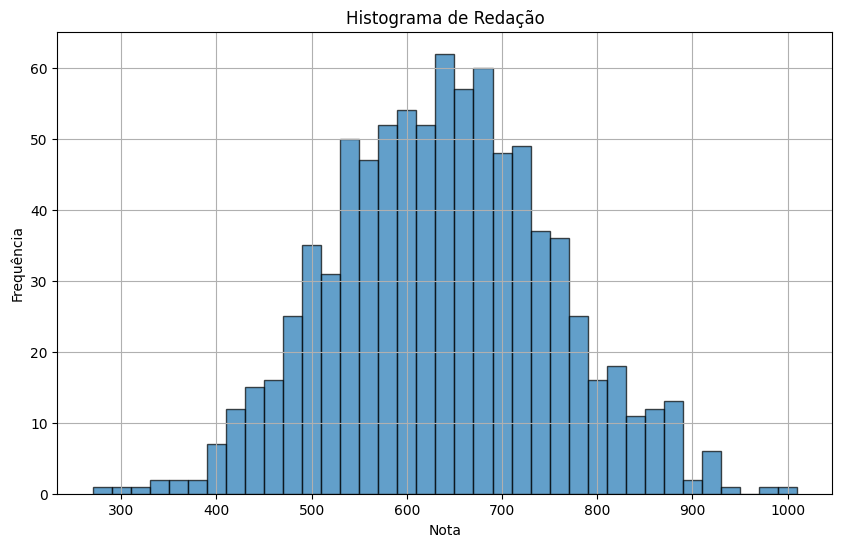

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(df['Redação'], bins=redacao_intervals, edgecolor='black', alpha=0.7)
plt.title('Histograma de Redação')
plt.xlabel('Nota')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()

O histograma de redação não é simétrico. Ele apresenta uma assimetria positiva, a cauda está inclinado para a direita. A distribuição dos dados tem um pico em torno da faixa de notas entre 600 e 700, depois a frequência de notas mais altas diminui. Portanto, não é simétrico, mas tende a ter mais notas na parte inferior da escala.

In [ ]:
# Definindo intervalos para Linguagens
linguagens_intervals = range(int(df['Linguagens'].min()), int(df['Linguagens'].max()) + 21, 20)

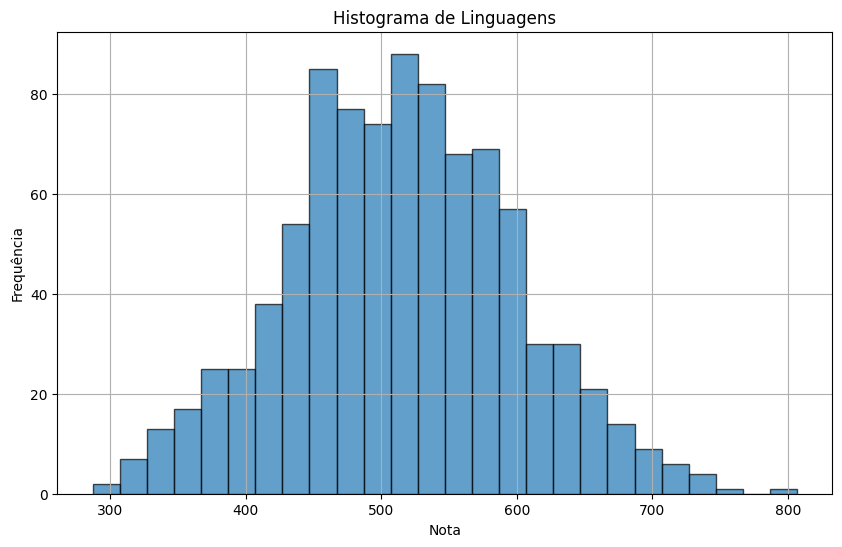

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(df['Linguagens'], bins=linguagens_intervals, edgecolor='black', alpha=0.7)
plt.title('Histograma de Linguagens')
plt.xlabel('Nota')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()

O histograma de Linguagens não é simétrico. Existe um pico de frequência em torno da nota 500. A distribuição não é uniforme e apresenta assimetria. A altura das barras não é igual em ambos os lados da distribuição.


**7. Agora coloque um range fixo de 0 até 1000, você ainda tem a mesma
opinião quanto a simetria? [plt.hist(dado, bins=_, range=[0, 1000])**

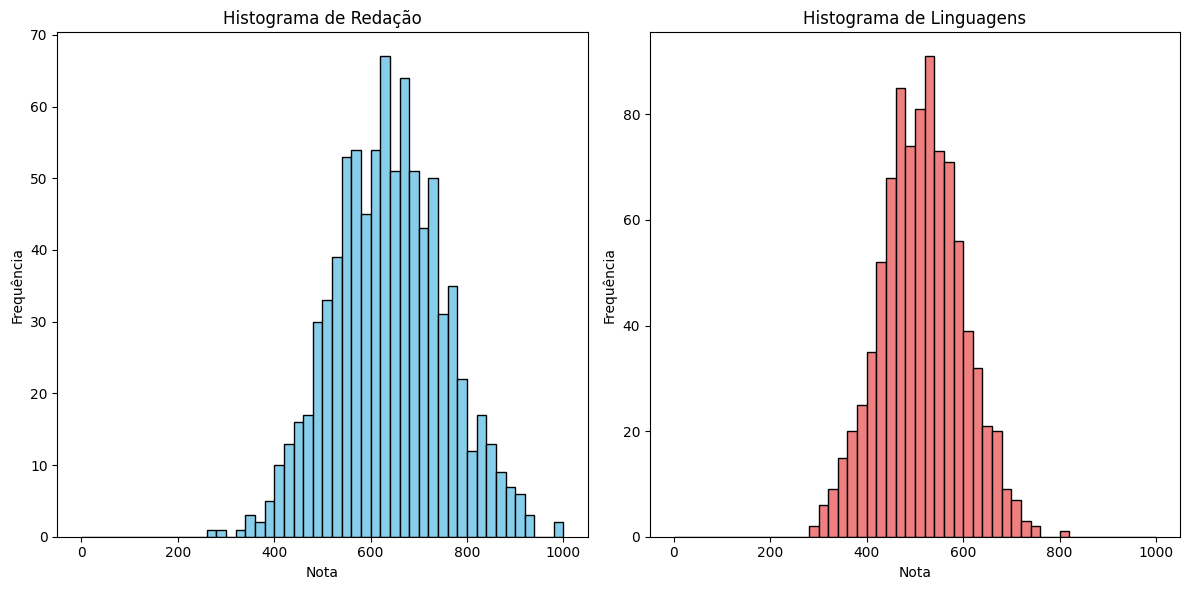

In [ ]:
plt.figure(figsize=(12, 6))

# Histograma de Redação
plt.subplot(1, 2, 1)
plt.hist(df['Redação'], bins=50, range=[0, 1000], color='skyblue', edgecolor='black')
plt.title('Histograma de Redação')
plt.xlabel('Nota')
plt.ylabel('Frequência')

# Histograma de Linguagens
plt.subplot(1, 2, 2)
plt.hist(df['Linguagens'], bins=50, range=[0, 1000], color='lightcoral', edgecolor='black')
plt.title('Histograma de Linguagens')
plt.xlabel('Nota')
plt.ylabel('Frequência')

plt.tight_layout()
plt.show()

**Histograma de Redação:**
- A frequência mais alta ocorre em torno de uma pontuação de 600.
- As frequências diminuem drasticamente para pontuações mais altas.
- A forma do histograma não é perfeitamente simétrica, mas tem uma aparência distinta.

**Histograma de Linguagens:**
- A frequência mais alta está em torno de uma pontuação de aproximadamente 500.
- As frequências diminuem em ambos os lados, criando uma aparência mais simétrica em comparação com o histograma da Redação.
- No entanto, ainda não é perfeitamente simétrico.

 No caso, nenhum dos histogramas é perfeitamente simétrico, mas eles exibem padrões distintos em termos de onde as pontuações mais altas e mais baixas estão concentradas e como diminuem em direção às extremidades. O fato de o histograma de Linguagens parecer mais simétrico sugere uma distribuição mais equilibrada das pontuações nessa disciplina, em comparação com o histograma de Redação.


**8. Faça um boxplot do quartil de todas as disciplinas de ciências da
natureza e redação. É possível enxergar outliers? Utilize o método IQR.**

In [ ]:
disciplinas_selecionadas = df[['Ciências da natureza', 'Redação', 'Matemática', 'Linguagens', 'Ciências humanas']]

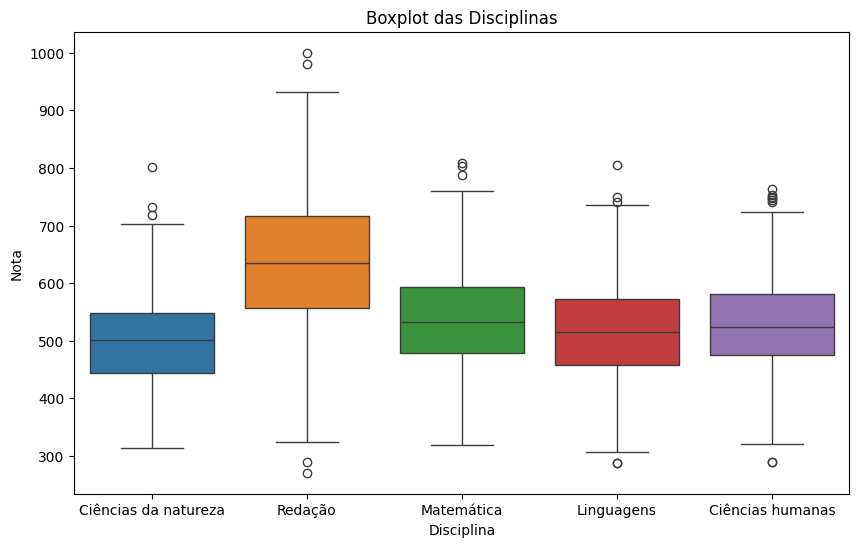

In [ ]:
# Criando o boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=disciplinas_selecionadas)
plt.title('Boxplot das Disciplinas')
plt.xlabel('Disciplina')
plt.ylabel('Nota')
plt.show()

In [ ]:
# Calculando o IQR para cada disciplina
Q1 = disciplinas_selecionadas.quantile(0.25)
Q3 = disciplinas_selecionadas.quantile(0.75)
IQR = Q3 - Q1

outliers = ((disciplinas_selecionadas < (Q1 - 1.5 * IQR)) | (disciplinas_selecionadas > (Q3 + 1.5 * IQR)))

# Mostrando linhas onde a coluna é True
outlier_rows = outliers[outliers.any(axis=1)]
outlier_rows

,Ciências da natureza,Redação,Matemática,Linguagens,Ciências humanas
9,False,True,False,False,False
28,False,False,False,True,False
38,False,False,False,False,True
79,False,False,False,False,True
136,False,False,False,True,False
325,True,False,False,False,False
340,False,False,False,False,True
421,False,False,False,False,True
422,False,False,False,True,False
448,False,False,False,False,True


**9. Remova todos os outliers e verifique se eles são passíveis de alterar a
média nacional significativamente? (considere significativamente um
valor acima de 5%)**

In [ ]:
# Removendo outliers
df_sem_outliers = df[~outliers.any(axis=1)]

# Verificando alteração na média nacional
media_nacional_original = df[['Ciências da natureza', 'Redação', 'Matemática', 'Linguagens', 'Ciências humanas']].mean()
media_nacional_sem_outliers = df_sem_outliers[['Ciências da natureza', 'Redação', 'Matemática', 'Linguagens', 'Ciências humanas']].mean()

# Calculando a diferença percentual
diferenca_percentual = ((media_nacional_sem_outliers - media_nacional_original) / media_nacional_original) * 100

print("Diferença percentual na média nacional sem outliers:")
diferenca_percentual

Diferença percentual na média nacional sem outliers:


Ciências da natureza   -0.263620
Redação                -0.198631
Matemática             -0.044370
Linguagens             -0.119292
Ciências humanas       -0.259122
dtype: float64

As diferenças estão todas abaixo de 0,3%, o que sugere que os outliers não estavam exercendo uma influência substancial sobre as médias nacionais das disciplinas

**10. Considerando valores nulos, tente encontrar qual seria a melhor medida
de tendência que pode substituir as notas nulas. Média, moda ou
mediana? Substitua o valor por todos os três e diga qual delas altera
menos a média geral e o desvio padrão.**

In [ ]:
df_preenchido = df.copy()
# Convertendo todas as colunas para numérico, tratando valores não numéricos como NaN
df_preenchido = df_preenchido.apply(pd.to_numeric, errors='coerce')


In [ ]:
# Preenchendo os valores nulos com a média, moda e mediana para cada coluna
for coluna in df_preenchido.columns:
    media_coluna = df_preenchido[coluna].mean()

    # Calculanndo a moda e substituindo os valores nulos
    moda_coluna = df_preenchido[coluna].mode()
    if not moda_coluna.empty:
        moda_coluna = moda_coluna.iloc[0]

    mediana_coluna = df_preenchido[coluna].median()

    # Substituindo os valores nulos pelos três métodos
    df_preenchido[coluna + '_media'] = df_preenchido[coluna].fillna(media_coluna)
    df_preenchido[coluna + '_moda'] = df_preenchido[coluna].fillna(moda_coluna)
    df_preenchido[coluna + '_mediana'] = df_preenchido[coluna].fillna(mediana_coluna)



/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


In [ ]:
# Calculando a média geral e o desvio padrão após o preenchimento para cada método
media_geral_original = df_preenchido.stack().mean()
desvio_padrao_original = df_preenchido.stack().std()

media_geral_media = df_preenchido.filter(like='_media').stack().mean()
desvio_padrao_media = df_preenchido.filter(like='_media').stack().std()

media_geral_moda = df_preenchido.filter(like='_moda').stack().mean()
desvio_padrao_moda = df_preenchido.filter(like='_moda').stack().std()

media_geral_mediana = df_preenchido.filter(like='_mediana').stack().mean()
desvio_padrao_mediana = df_preenchido.filter(like='_mediana').stack().std()


In [ ]:
# Comparando as alterações
alteracao_media_geral_media = abs((media_geral_media - media_geral_original) / media_geral_original) * 100
alteracao_desvio_padrao_media = abs((desvio_padrao_media - desvio_padrao_original) / desvio_padrao_original) * 100

alteracao_media_geral_moda = abs((media_geral_moda - media_geral_original) / media_geral_original) * 100
alteracao_desvio_padrao_moda = abs((desvio_padrao_moda - desvio_padrao_original) / desvio_padrao_original) * 100

alteracao_media_geral_mediana = abs((media_geral_mediana - media_geral_original) / media_geral_original) * 100
alteracao_desvio_padrao_mediana = abs((desvio_padrao_mediana - desvio_padrao_original) / desvio_padrao_original) * 100

print("Alteração na média geral e no desvio padrão para cada método:")
print(f"Média - Alteração na média geral: {alteracao_media_geral_media:.2f}%, Alteração no desvio padrão: {alteracao_desvio_padrao_media:.2f}%")
print(f"Moda - Alteração na média geral: {alteracao_media_geral_moda:.2f}%, Alteração no desvio padrão: {alteracao_desvio_padrao_moda:.2f}%")
print(f"Mediana - Alteração na média geral: {alteracao_media_geral_mediana:.2f}%, Alteração no desvio padrão: {alteracao_desvio_padrao_mediana:.2f}%")


Alteração na média geral e no desvio padrão para cada método:
Média - Alteração na média geral: 4.72%, Alteração no desvio padrão: 5.75%
Moda - Alteração na média geral: 2.77%, Alteração no desvio padrão: 3.70%
Mediana - Alteração na média geral: 4.68%, Alteração no desvio padrão: 5.66%
